## Loan Approval Prediction using Machine Learning

#### You can download dataset link here:"[Loan Prediction Dataset](https://1drv.ms/x/c/3023233cb9d01f98/EUrpWLd6NQdAmo-d7py_G-sB8Q91dHHGNYJHjurnBBSRNg?e=1Okcvd)


#### Machine Learning Life Cycle
1. Problem Definition
2. Data Collection
3. Data Cleaning and Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering and Selection
6. Model Selection
7. Model Training
8. Model Evaluation and Tuning


### 1. Problem Definition

Loan approval decisions are pivotal in shaping financial inclusion, risk management, and customer satisfaction. In this project, we use 
machine learning to build a predictive model that determines whether a loan applicant is likely to be approved based on historical patterns and 
applicant attributes.
The dataset contains 13 key features, including demographic information, income details, credit history, and property location. Each record 
represents an applicant’s profile and their loan approval status (Approved or Not Approved)



### Loan Approval Dataset Dictionary

| Column              | Description                                                                 |
|---------------------|------------------------------------------------------------------------------|
| Loan                | A unique ID for each applicant                                               |
| Gender              | Gender of the applicant (Male / Female)                                     |
| Married             | Marital status of the applicant (Yes / No)                                  |
| Dependents          | Number of dependents the applicant has                                       |
| Education           | Educational qualification (Graduate / Not Graduate)                         |
| Self_Employed       | Indicates if the applicant is self-employed (Yes / No)                       |
| ApplicantIncome     | Income of the applicant                                                      |
| CoapplicantIncome   | Income of the co-applicant                                                   |
| LoanAmount          | Loan amount requested (in thousands)                                        |
| Loan_Amount_Term    | Term of the loan (in months)                                                 |
| Credit_History      | Credit history score of the applicant (1 = good repayment, 0 = poor history) |
| Property_Area       | Area where the property is located (Urban / Semiurban / Rural)              |
| Loan_Status         | Status of loan approval (Y = Approved, N = Not Approved)                    |

### 2. Data Collection

##### 1. Import Necessary Libraries
Start by importing the libraries required for data cleaning and exploration.

In [1]:
import pandas as pd
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt       # For making plots
import seaborn as sns                 # For more visually appealing plotsimport pandas as pd


##### 2. Load the Dataset
Load the dataset and inspect its structure.

In [2]:
data = pd.read_csv("C:\\Users\\ibora\\OneDrive\\LoanApprovalPrediction.csv")

In [3]:
# Display the first 5 rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Display the last 5 rows
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Data Cleaning and Preprocessing

In [5]:
# Initial Data Inspection - check the Shape of the Data: Inspect the number of rows and columns

data.shape

(598, 13)

#### Observation
there are 598 rows and 13 columns

In [8]:
# Initial Data Inspection - check the Shape of the Data: Inspect the number of rows and columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


#### Observation
The dataset consists of 598 loan applications across 13 features, with a mix of numeric and categorical data types—some columns like **Credit_History,** 
**LoanAmount,** and **Loan_Amount_Term** contain missing values that will require careful preprocessing.


In [9]:
# Check for Missing Values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

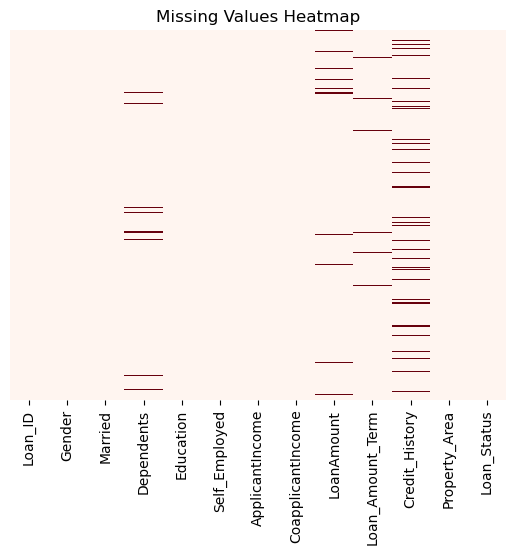

In [12]:
# Plot a heatmap of missing values
sns.heatmap(data.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

#### Observation
The heatmap reveals distinct missing data patterns in several columns—particularly `Credit_History`, `LoanAmount`, `Loan_Amount_Term`, and `Dependents`,
where horizontal red streaks indicate gaps across multiple records. Most other columns like `Gender`, `Education`, and `Loan_Status` appear fully populated.


In [13]:
# Handling Missing values

# Imputing missing values for LoanAmount using median, which is less sensitive to outliers and reflects a typical loan size.
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# Imputing missing values for Loan_Amount_Term using mode, assuming the most common term (likely 360 months) applies to most applicants.
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Imputing Dependents using mode as family structure tends to follow frequent patterns; mode preserves categorical structure.
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

# Imputing Credit_History with -1 to denote unknown credit records without assuming risk level, which can be treated as a separate class.
data['Credit_History'].fillna(-1, inplace=True)

# Optional: Creating missing value flags to help the model learn from uncertainty patterns.
data['LoanAmount_missing'] = data['LoanAmount'].isnull().astype(int)

C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\1302026445.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\1302026445.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [14]:
# Check for Duplicated Rows

# Count total duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


#### Observation
No duplicates


In [15]:
# Summary Statistics of numerical columns
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_missing
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.0
mean,0.740803,5292.252508,1631.499866,144.337793,342.341137,0.692308,0.0
std,1.003198,5807.265364,2953.315785,81.303985,64.494977,0.614434,0.0
min,0.000000,150.000000,0.000000,9.000000,12.000000,-1.000000,0.0
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.0
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000,0.0
75%,1.000000,5746.000000,2324.000000,163.500000,360.000000,1.000000,0.0
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,0.0


#### Observation
The data shows significant variability in income and loan amounts—**`ApplicantIncome`** ranges from 150 to 81,000, and **`LoanAmount`** 
from 9 to 650—suggesting potential outliers that could skew model performance. Also, most loans are granted for a term of 360 months, 
and **`Credit_History`** includes a special case value of -1 representing missing data.


### 4. Exploratory Data Analysis (EDA)

#### A. Univariate Analysis (Individual Features)

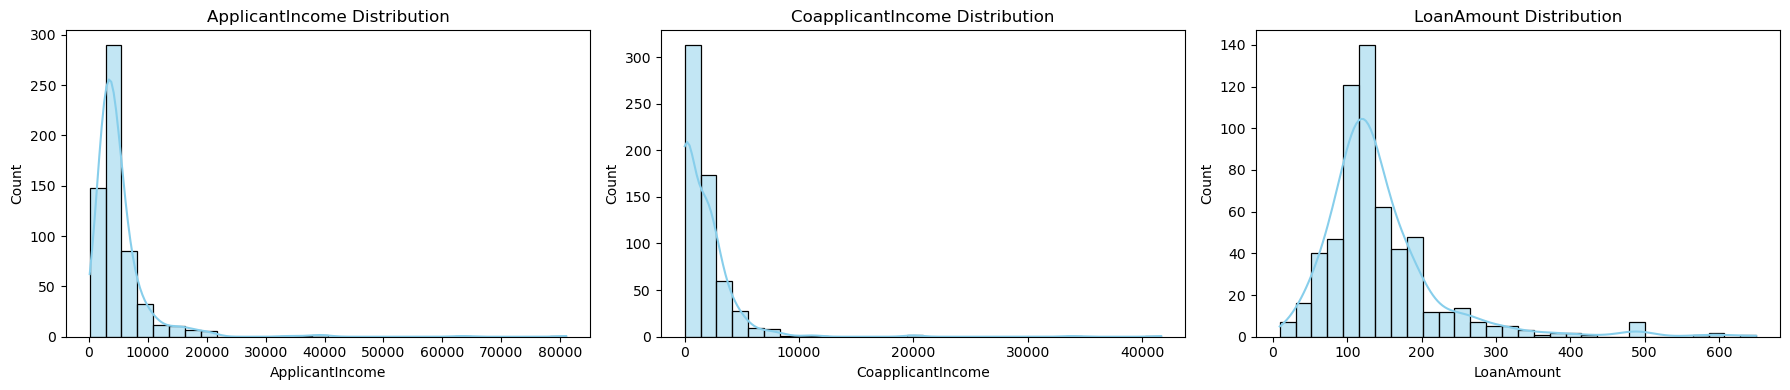

In [25]:
# Numerical distribution

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Row 1: Distribution Plots
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


#### Observation
**Applicant income** and **loan amount** show heavy right skew, suggesting the presence of outliers.

C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\1985675616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\1985675616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\1985675616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\1985675616.py:9: FutureWarnin

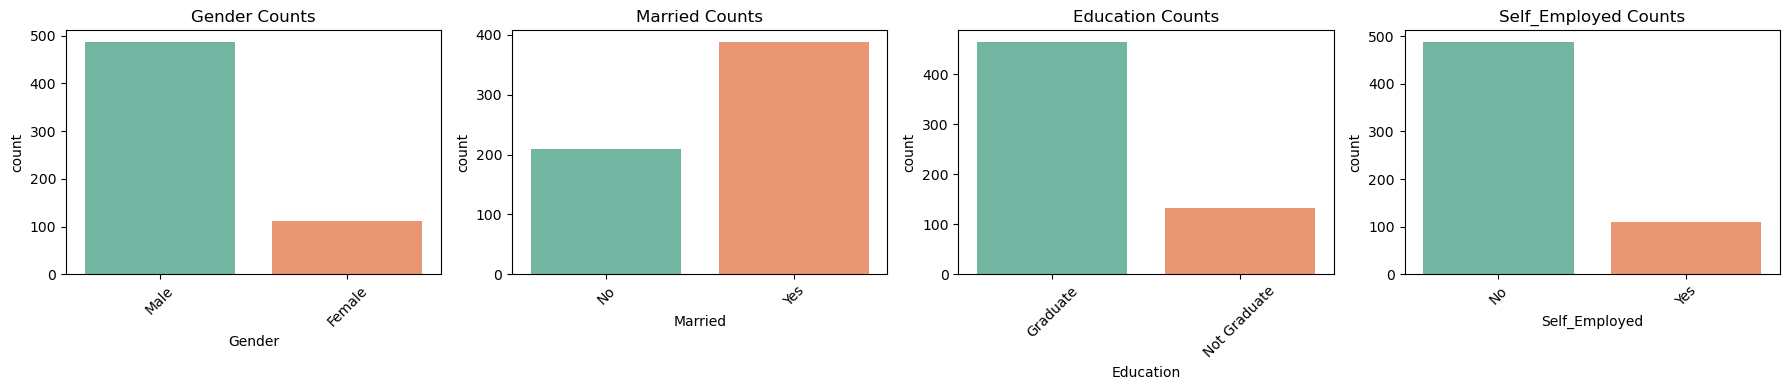

In [26]:
# Count Plot (Cartegorical Features)

categorical_cols =  ['Gender', 'Married', 'Education', 'Self_Employed',]

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Row 2: Categorical Count Plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{col} Counts')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Observation: 
Most applicants are male, married, graduates and not self employed. 

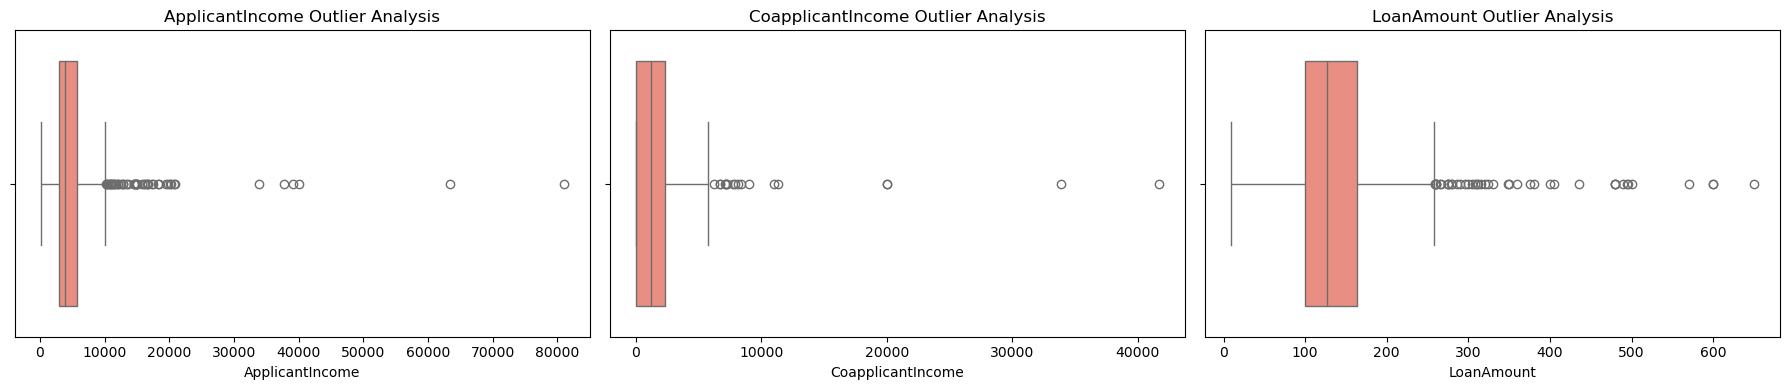

In [27]:
# Boxplots (Outliers Detection)

boxplot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Row 3: Outlier Analysis
for i, col in enumerate(boxplot_cols):
    sns.boxplot(x=data[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'{col} Outlier Analysis')

plt.tight_layout()
plt.show()


#### Observation
The box plots highlight the presence of significant outliers across all three financial features. 🧾

- **ApplicantIncome** shows extreme values reaching up to 80,000, far above the interquartile range, suggesting some applicants earn substantially more than others.
- **CoapplicantIncome** also contains high outliers nearing 40,000, though the bulk of values remain clustered below 10,000.
- **LoanAmount** reveals that most loans are under 200K, but a few cases stretch toward 600K, indicating unusually large requests that may influence model sensitivity.

These outliers could skew training results

#### B. Bivariate Analysis (Relationships)


C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\604335205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data, ax=axes[1, 0], palette='coolwarm')
C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\604335205.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data, ax=axes[1, 1], palette='coolwarm')
C:\Users\ibora\AppData\Local\Temp\ipykernel_14236\604335205.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=

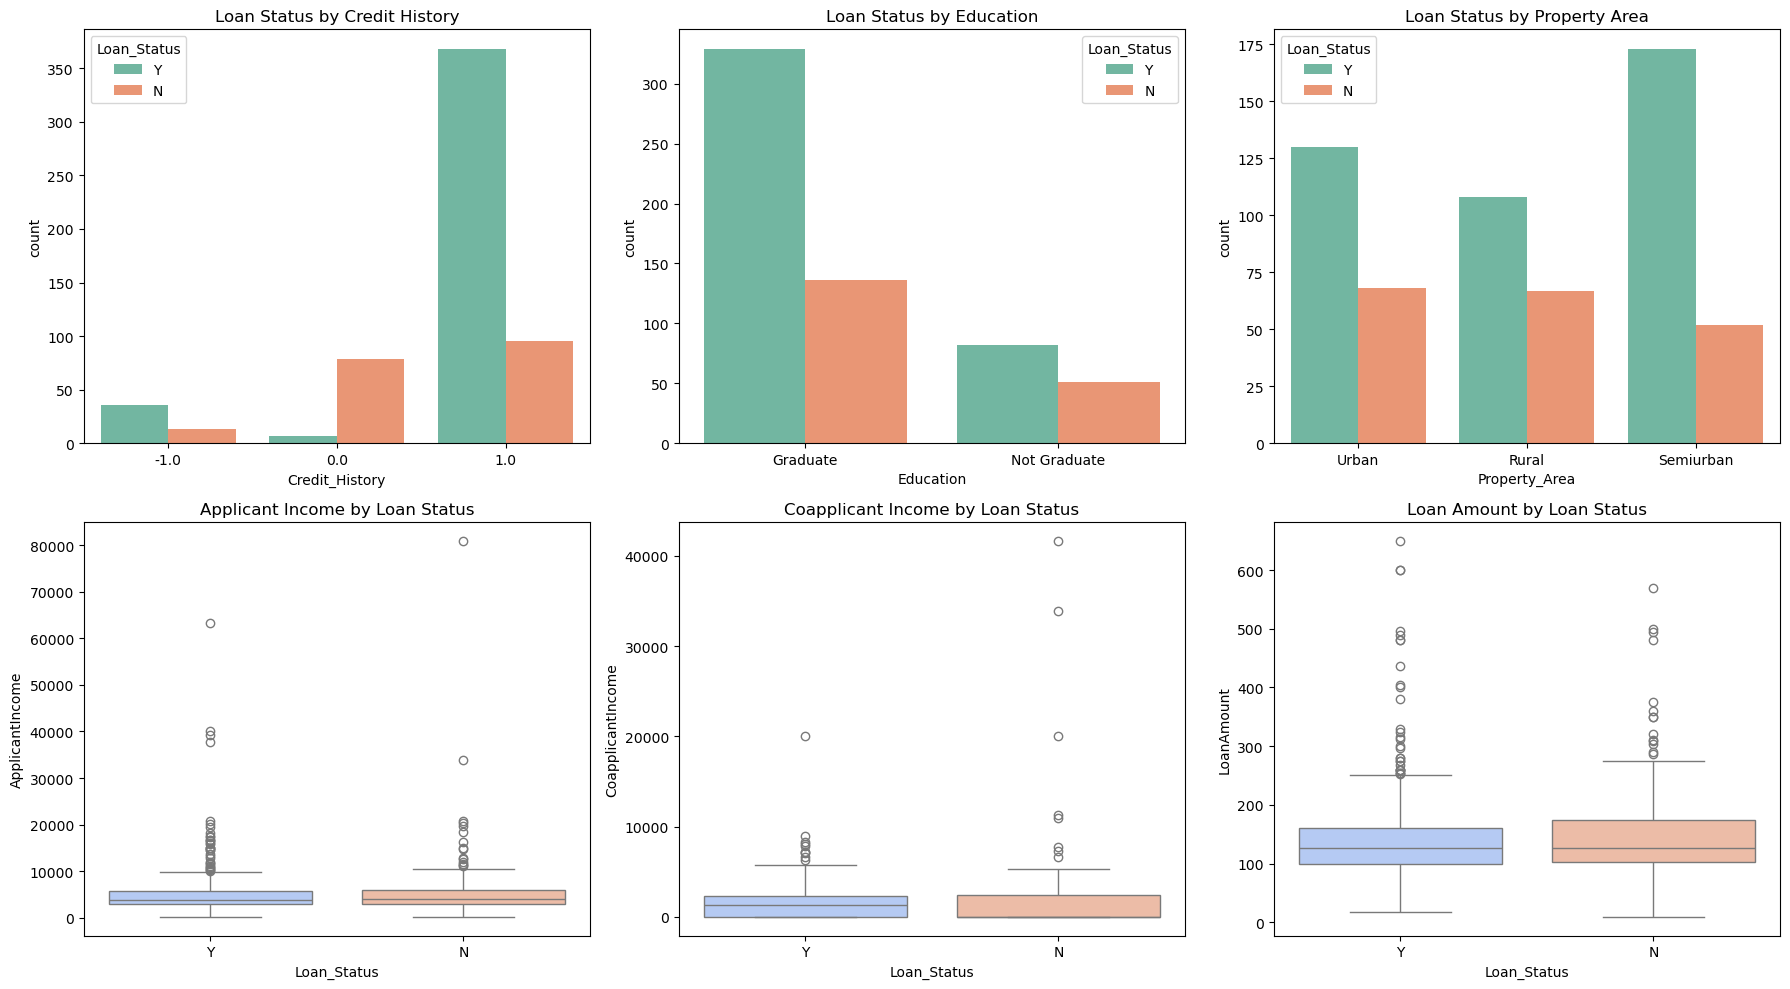

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

# Plot 1: Loan Status vs. Credit History
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title("Loan Status by Credit History")

# Plot 2: Loan Status vs. Education
sns.countplot(x='Education', hue='Loan_Status', data=data, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title("Loan Status by Education")

# Plot 3: Loan Status vs. Property Area
sns.countplot(x='Property_Area', hue='Loan_Status', data=data, ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title("Loan Status by Property Area")

# Plot 4: ApplicantIncome by Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title("Applicant Income by Loan Status")

# Plot 5: CoapplicantIncome by Loan Status
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("Coapplicant Income by Loan Status")

# Plot 6: LoanAmount by Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data, ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title("Loan Amount by Loan Status")

plt.tight_layout()
plt.show()

#### Observation
The bivariate plots reveal strong approval trends among applicants with good credit history, graduate education, and properties in semiurban areas. 
Despite some outliers, income and loan amount distributions show fairly similar medians across loan status categories, suggesting that other factors 
may play a more decisive role in approval outcomes.


#### C. Correlation Analysis
Checking for multicollinearity among numerical features.

In [35]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

#### Observation
As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [36]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


#### Observation
Checking the object datatype columns to find out if there is still any left. As seen above we have 0

<Axes: >

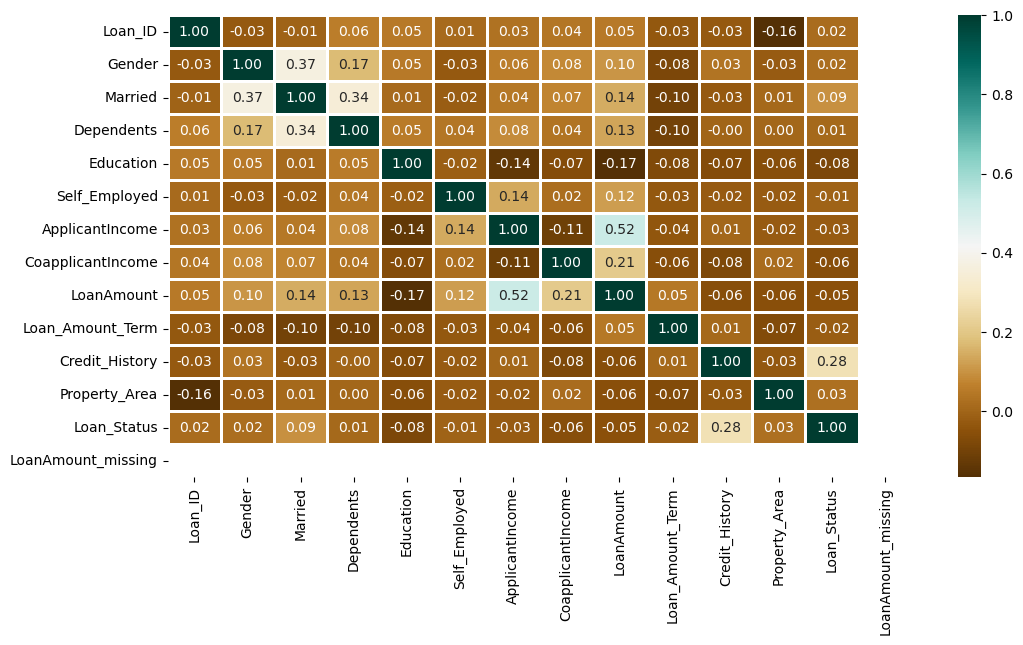

In [37]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

#### Observation
The correlation matrix highlights a strong positive relationship between **`Credit_History`** and **`Loan_Status`**, reinforcing its predictive 
importance. Most other features—including income and loan amount—show relatively weak correlations with loan approval, suggesting that nonlinear models 
may be more effective in capturing complex interactions.


### 5. Feature Engineering and Selection

In [39]:
# Splitting Dataset 

from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((478, 13), (120, 13), (478,), (120,))

#### Obseravtion
 Model training using about 80% of the data, and kept the remaining 20% aside to test how well it learned.


### 6. Model Selection

In [43]:
# Model Building - Build and evaluate multiple machine learning models.

# 1. Setting up Logistic Regression, Random Forest, KNN, and SVC models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create model objects
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svc_model = SVC(kernel='rbf', probability=True, random_state=42)

### 7. Model Training

In [44]:
# Train the Moedels

# Fit all models
log_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
svc_model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True, random_state=42)

In [45]:
# Evaluate Performance (Accuracy Example)
from sklearn.metrics import accuracy_score

# Predictions
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# Accuracy scores
print("Logistic Regression Accuracy:", accuracy_score(Y_test, log_pred))
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))
print("KNN Accuracy:", accuracy_score(Y_test, knn_pred))
print("SVC Accuracy:", accuracy_score(Y_test, svc_pred))



Logistic Regression Accuracy: 0.6916666666666667
Random Forest Accuracy: 0.8333333333333334
KNN Accuracy: 0.5833333333333334
SVC Accuracy: 0.725


#### Observation
- **Random Forest** is the star performer with 83% accuracy. It’s like having a committee of decision-makers who each give their vote, and the group tends to be pretty reliable.
- **SVC (Support Vector Classifier)** follows with 73%, using mathematical boundaries to separate approvals from rejections. Think of it like drawing a fine line to split "yes" and "no."
- **Logistic Regression** gives you 69% accuracy, which is solid as a baseline—simple, interpretable, and good for explaining to stakeholders how decisions are made.
- **KNN (K-Nearest Neighbors)** trails at 58%. It makes predictions based on what nearby applicants did. but it's a bit shaky—imagine copying your neighbor’s homework and realizing they guessed!


### 8. Model Evaluation

Key Metrics 

    
1. ** Accuracy**   Overall % of correct predictions  
    
2. **Precision**  Of the ones predicted as “Approved,” how many really were?  

3. **Recall**  Of all real “Approved” cases, how many did we successfully catch?  

4. **F1 Score**  The balance between precision and recall  

5. **Confusion Matrix** A table showing correct vs incorrect predictions per class 






In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store scores for each model
metrics = []

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "KNN": knn_model,
    "SVC": svc_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    metrics.append({
        "Model": name,
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "F1 Score": round(f1, 2)
    })

import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model  Precision  Recall  F1 Score
0  Logistic Regression       0.75    0.87      0.80
1        Random Forest       0.85    0.93      0.89
2                  KNN       0.69    0.77      0.73
3                  SVC       0.73    0.99      0.84


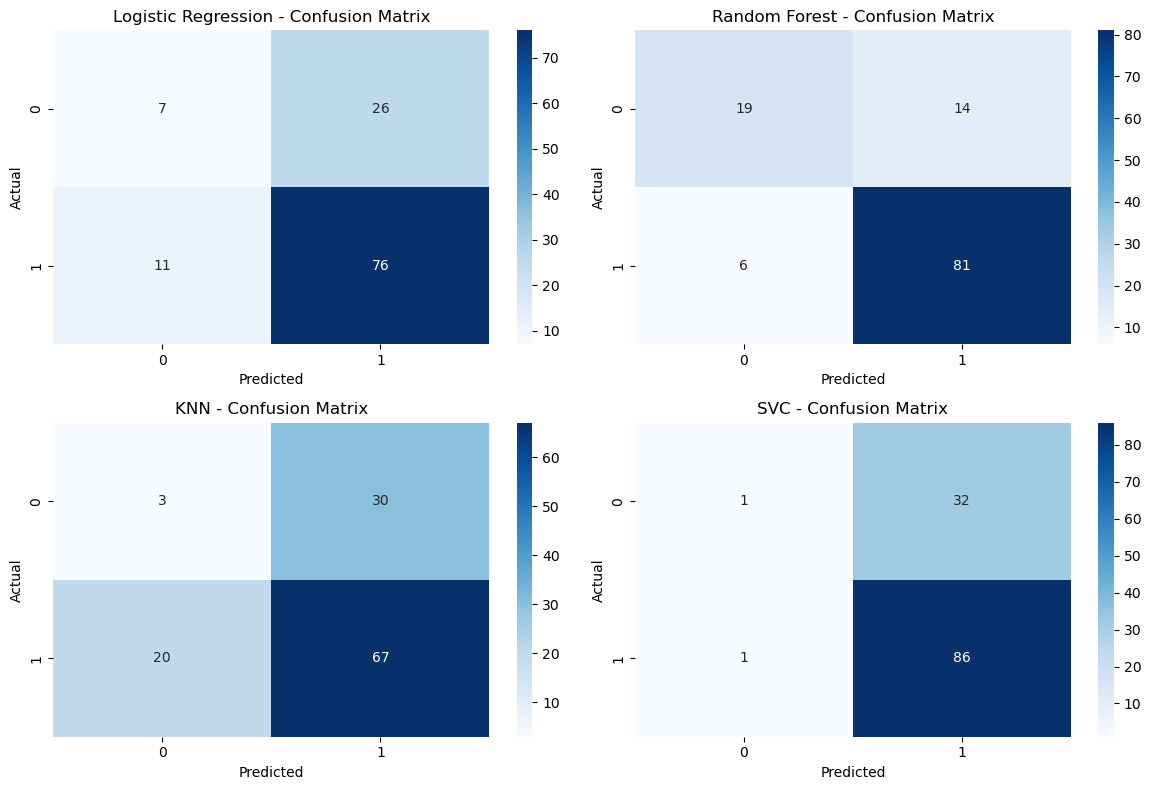

In [51]:
# List of models and names
models = [
    (log_model, "Logistic Regression"),
    (rf_model, "Random Forest"),
    (knn_model, "KNN"),
    (svc_model, "SVC")
]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust size as needed

# Loop through models and plot each confusion matrix
for ax, (model, name) in zip(axes.flat, models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### Observation
Interpreting each confusion matrix like a mini performance review:


### Logistic Regression  
- **7** correctly rejected (True Negatives)  
- **76** correctly approved (True Positives)  
- **26** falsely approved rejections (False Positives)  
- **11** missed approvals (False Negatives)  
**Observation:** This model leans toward approving loans—it catches most actual approvals but often wrongly approves applicants who shouldn’t be. It’s moderately precise but could benefit from better caution.

### Random Forest  
- **19** correct rejections  
- **81** correct approvals  
- **14** false approvals  
- **6** missed approvals  
**Observation:** Most balanced and accurate—strong on both sides. It minimizes mistakes, giving trustworthy predictions for stakeholders who need performance and reliability.

### K-Nearest Neighbors  
- **3** correct rejections  
- **67** correct approvals  
- **30** false approvals  
- **20** missed approvals  
**Observation:** Struggles with clarity. It’s heavily misled by surrounding data points, leading to many incorrect decisions—both false approvals and missed chances.

### Support Vector Classifier (SVC)  
- **1** correct rejection  
- **86** correct approvals  
- **32** false approvals  
- **1** missed approval  
 **Observation:** High recall, very low precision. It's aggressive about saying "Yes" fantastic at not missing approvals, but risky for approving the wrong ones.

Reframing this for decision-makers: Random Forest gives the peace of mind, Logistic is cautious but messy, SVC finds nearly all approvals but with 
a risk, and KNN is just too noisy.

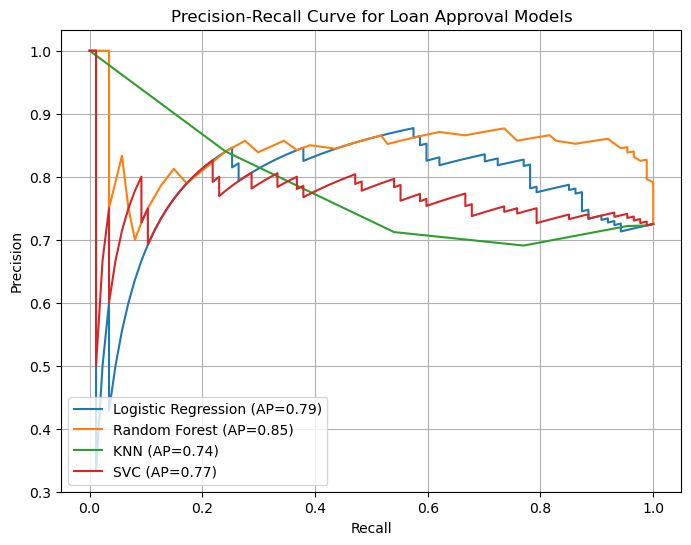

In [52]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_pr_curve(model, model_name):
    # Get probabilities for the positive class
    y_scores = model.predict_proba(X_test)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)
    avg_precision = average_precision_score(Y_test, y_scores)

    plt.plot(recall, precision, label=f"{model_name} (AP={avg_precision:.2f})")

# Plot curves for models that support predict_proba
plt.figure(figsize=(8, 6))

plot_pr_curve(log_model, "Logistic Regression")
plot_pr_curve(rf_model, "Random Forest")
plot_pr_curve(knn_model, "KNN")
plot_pr_curve(svc_model, "SVC")  # You used probability=True, so this will work

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Loan Approval Models")
plt.legend(loc="lower left")
plt.grid()
plt.show()

###  Final Conclusion
Loan approval decisions affect financial inclusion, risk control, and customer satisfaction. In this project, we built a predictive model using 13 applicant features (e.g., income, credit history, demographics) to classify loan approvals.

After testing multiple classifiers, **Random Forest** delivered the strongest performance, with high accuracy and balanced precision-recall. **Logistic Regression** provides transparency, while **SVC** is recall-heavy but prone to false approvals. **KNN** was the least reliable.


###  Recommendation

- Use **Random Forest** as the main model for deployment  
- Apply **Logistic Regression** when interpretability is key  
- Consider **SVC** only when high recall outweighs risk  
- Avoid **KNN** for production use without major tuning  


